# Twitter Data Analysis
## Brody Coyne

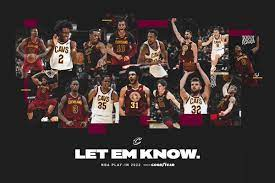

By creating a Twitter developer account and using their API, I was able to gather hundreds of tweets to look at the public sentiment around the Cleveland Cavaliers basketball team. Since the NBA is relatively global I wanted to focus the report on looking at the different languages that people spoke who were tweeting about the Cavs. I know that the global market is pretty large in the NBA as a whole. The Cavs specifically have a very good and well known Spanish broadcaster named [Rafael "Rafa" Hernandez-Brito](https://www.news5cleveland.com/news/local-news/meet-the-spanish-voice-of-the-cavaliers-championing-the-team-and-the-latin-community). This shows the significance of the Spanish speaking audience and non-English speaking audience as a whole.

In [1]:
import pandas as pd
import json
import requests
import urllib
from matplotlib import pyplot as plt

In order to access Twitter's API I had to get Authorization from Twitter and I was able to do that by gathering the bearer token and running it through my code.

In [2]:
bearer_token = pd.read_csv("bearer922-01.txt", header = 0, sep = '\t')

In [3]:
header = {'Authorization':'Bearer {}'.format(bearer_token['Bearer_Token'].iloc[0])}

Next, I created a query to limit the tweets I collected to be about the Cavs by using keywords and hashtags. I also wanted to collect information relating to the specific tweets so I used "user_fields" and "tweet_fields" to find aspects of the tweet like the author ID, creation time, and language.

In [4]:
endpoint = 'https://api.twitter.com/2/tweets/search/recent'

In [5]:
query_param = urllib.parse.quote('from:Cavs OR(Cleveland Cavs OR Cleveland Cavaliers OR Cleveland Basketball OR #LetEmKnow)')

In [6]:
user_fields = 'username,name'

In [7]:
tweet_fields = 'author_id,public_metrics,created_at,lang'

In [8]:
expansions = 'entities.mentions.username'

In [9]:
query_url = endpoint + '?query={}&user.fields={}&tweet.fields={}&expansions={}'.format(query_param,user_fields,tweet_fields,expansions)

In [10]:
query_url

'https://api.twitter.com/2/tweets/search/recent?query=from%3ACavs%20OR%28Cleveland%20Cavs%20OR%20Cleveland%20Cavaliers%20OR%20Cleveland%20Basketball%20OR%20%23LetEmKnow%29&user.fields=username,name&tweet.fields=author_id,public_metrics,created_at,lang&expansions=entities.mentions.username'

I then created the variable response which gathers all of the twitter data by combining the endpoint, query, user_fields, tweet_fields, and expansions.

In [11]:
response = requests.get(query_url, headers = header)

In [12]:
response

<Response [200]>

In [13]:
response_dict = json.loads(response.text)

After checking the tweets I collected to see if the right type of tweets were returned, I created a DataFrame using pandas to store all of the tweets.

In [14]:
response_df = pd.DataFrame(response_dict['data'])
response_df2 = response_df

In [15]:
response_df.head()

,created_at,public_metrics,author_id,edit_history_tweet_ids,lang,text,id,entities
0,2022-11-27T04:13:32.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1197486138274902017,[1596718842348449792],en,Cleveland Cavaliers vs Milwaukee #Bucks - Full...,1596718842348449792,NaN
1,2022-11-27T04:12:49.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1557174562407649280,[1596718661435150336],en,"@Dunzie12 I agree, #LetEmKnow",1596718661435150336,"{'mentions': [{'start': 0, 'end': 9, 'username..."
2,2022-11-27T04:11:24.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1148422870315331584,[1596718305091280896],en,The 2022 New Mexico BASKETBALL 6A Championship...,1596718305091280896,NaN
3,2022-11-27T04:10:28.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",37195163,[1596718072362332161],en,RT @CleBBallClassic: We had an incredible day ...,1596718072362332161,"{'mentions': [{'start': 3, 'end': 19, 'usernam..."
4,2022-11-27T04:09:03.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1556898030569553920,[1596717716202991617],en,⛹️ HS boys basketball Live\n🏀 Walsh Jesuit 🆚 B...,1596717716202991617,"{'mentions': [{'start': 140, 'end': 149, 'user..."


I noticed that public_metrics has data about the retweets, replies, and likes so I pulled out that data to show it in a table.

In [16]:
public_metrics_df = pd.DataFrame(list(response_df['public_metrics']))

In [17]:
public_metrics_df

,retweet_count,reply_count,like_count,quote_count
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0
5,0,0,0,0
6,2,0,0,0
7,0,0,0,0
8,1,0,0,0
9,1,13,24,0


Because I was only getting back 10 tweets at a time I needed to create a function to collect more tweets. I decided to run the function 50 times which allowed me to collect 500 tweets to analyze.

In [18]:
def twt_recent_search (query, num_pages, header):
    response_list = []
    next_token = ''
    for i in range(0, num_pages):
        if i > 0:
            this_query = query + "&next_token={}".format(next_token)
        else:
            this_query = query
        
        this_response = requests.get(this_query, headers = header)
        this_response_dict = json.loads(this_response.text)
        response_list.append(this_response_dict)
        next_token = this_response_dict['meta']['next_token']
        
    return response_list

In [19]:
my_responses = twt_recent_search(query_url, 50, header)

I then decided to reorganize my DataFrame to make the responses make more sense.

In [20]:
results_1 = pd.DataFrame.from_records(my_responses)

In [21]:
data_list = list(results_1['data'])

In [22]:
data_list_of_dfs = [pd.DataFrame(x) for x in data_list]

In [23]:
data_df = pd.concat(data_list_of_dfs)

In [24]:
data_df.head()

,id,author_id,created_at,lang,edit_history_tweet_ids,public_metrics,text,entities
0,1596718842348449792,1197486138274902017,2022-11-27T04:13:32.000Z,en,[1596718842348449792],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Cleveland Cavaliers vs Milwaukee #Bucks - Full...,NaN
1,1596718661435150336,1557174562407649280,2022-11-27T04:12:49.000Z,en,[1596718661435150336],"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@Dunzie12 I agree, #LetEmKnow","{'mentions': [{'start': 0, 'end': 9, 'username..."
2,1596718305091280896,1148422870315331584,2022-11-27T04:11:24.000Z,en,[1596718305091280896],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",The 2022 New Mexico BASKETBALL 6A Championship...,NaN
3,1596718072362332161,37195163,2022-11-27T04:10:28.000Z,en,[1596718072362332161],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @CleBBallClassic: We had an incredible day ...,"{'mentions': [{'start': 3, 'end': 19, 'usernam..."
4,1596717716202991617,1556898030569553920,2022-11-27T04:09:03.000Z,en,[1596717716202991617],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",⛹️ HS boys basketball Live\n🏀 Walsh Jesuit 🆚 B...,"{'mentions': [{'start': 140, 'end': 149, 'user..."


I checked to see if the function ran as intended and if my query was broad enough to collect enough data. I intended to collect 500 tweets and it did collect 500 tweets.

In [25]:
len(data_df.index)

498

Due to focusing on the different languages that people spoke who tweeted about the Cavs, I wanted to sort by the languages to see all of the different ones. Unsurprisingly, English was the most popular language spoke. However, I was a bit surprised that Portuguese and Japanese were the next most popular languages. I would have expected that Spanish would have been second but it was all the way at 6. 

In [26]:
data_df_num = data_df.groupby('lang').count().sort_values('author_id', ascending=False)

In [27]:
data_df_num

,id,author_id,created_at,edit_history_tweet_ids,public_metrics,text,entities
lang,,,,,,,
en,435,435,435,435,435,435,237
ja,20,20,20,20,20,20,0
pt,15,15,15,15,15,15,8
zxx,8,8,8,8,8,8,4
qme,4,4,4,4,4,4,3
es,3,3,3,3,3,3,1
und,3,3,3,3,3,3,2
qht,2,2,2,2,2,2,0
tr,2,2,2,2,2,2,1


In [28]:
data_df_num = data_df_num.reset_index()

I decided that visualizing the data through a bar chart would be the best method. Obviously, the overwhelming majority of the tweets were in English but it was interesting to see how there was a significant amount of tweets in other languages.

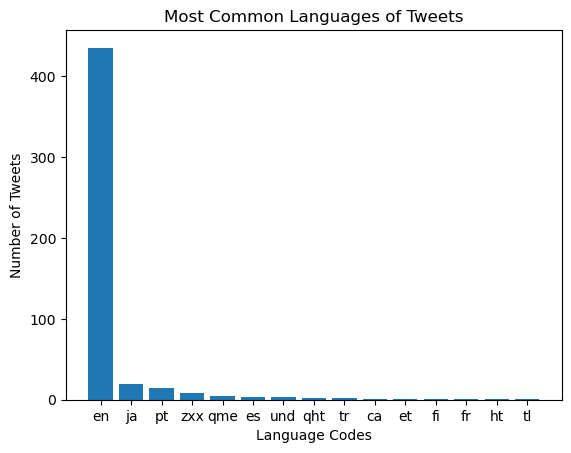

In [29]:
fig, ax1 = plt.subplots()
lang_num = data_df_num['public_metrics']
lang_name = data_df_num['lang']
ax1.bar(lang_name, lang_num)

ax1.set_title('Most Common Languages of Tweets')
ax1.set_ylabel('Number of Tweets')
ax1.set_xlabel('Language Codes')

plt.show()

I saved all of the tweets in a csv file so that the I save all of the tweets that I collect at a specific time. This means that when I rerun the code it will not change the first set of tweets that I collected.

In [30]:
data_df.to_csv('cavstwitterdata1.csv', encoding = 'utf-8')

In [31]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data_df.to_csv('out.zip', index=False,
          compression=compression_opts)

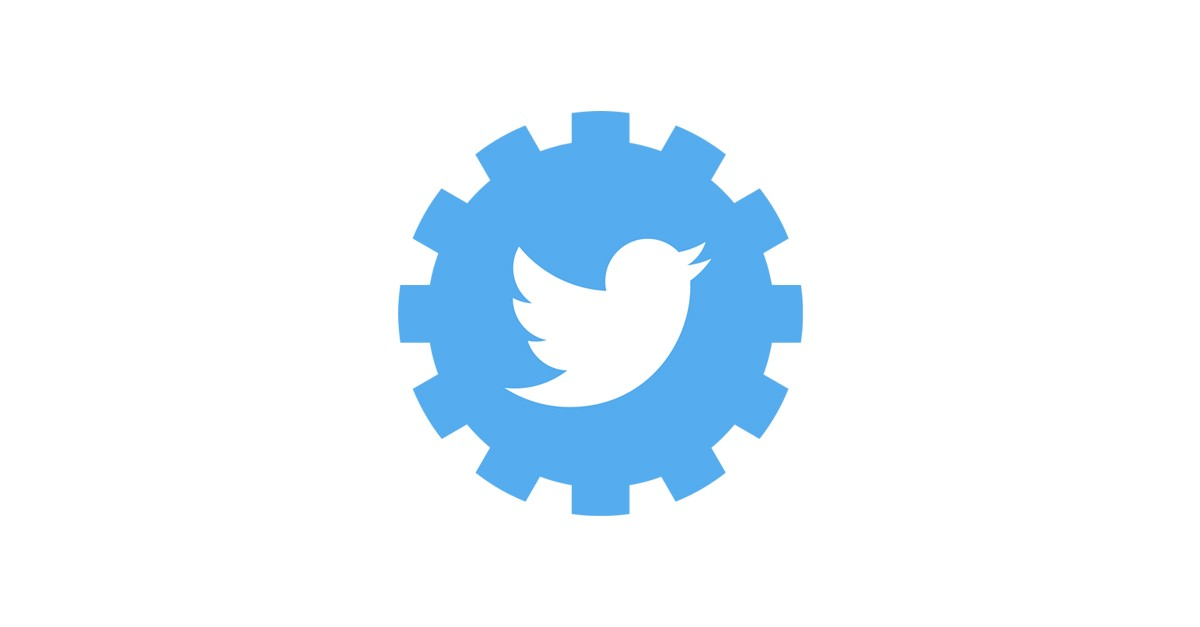

After looking through all of the tweets I collected. I noticed that a lot of the tweets are retweets which causes a lot of repeats. While including retweets can obviously be a good way to look at the data because retweets are still interactions. If I could update this project in any way I would probably want to look at the data without retweets so I can only focus on collecting tweets individual people wrote.

Overall, this project helped to to understand the overall sentiment around the Cleveland Cavaliers during the beginning of the season. I was also able to see the many different languages that people who discussed the Cavs spoke. The data I collected is a good starting point and I can use this data to analyze many more different aspects about tweets about the Cavs.